# Tratar dados concatenados do Data Logger
Este notebook utiliza a biblioteca Pandas para tratar os dados concatenados no notebook `concatenar-dados-datalogger`.

---

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Charts styling
#plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'

## Dados bacia RB01

### Tratamento e limpeza dos dados

In [2]:
# Loads data from CSV file to Pandas DataFrame object
df1 = pd.read_csv('RB01_dados_concatenados.csv')
df1.head()

Date      Time   Batt  SDI21  SDI22  SDI11  SDI01  SDI07
0  16/03/11  11:30:00  12.76   1.11      4   1.02   15.0   17.8
1  16/03/11  11:40:00  12.76   0.00      0   1.02   15.0   17.8
2  16/03/11  11:50:00  13.07   0.00      0   1.02   14.0   17.8
3  16/03/11  12:00:00  13.15   0.00      0   1.02   14.0   17.9
4  16/03/11  12:10:00  12.84   0.00      0   1.02   13.0   17.9

In [3]:
# Drops unused columns and renames some
df1 = df1.drop(['Batt', 'SDI22', 'SDI01','SDI07'], axis=1)
df1 = df1.rename(index=str, columns={"SDI21": "Precipitation", "SDI11": "Level"})

# Manipulates DataFrame to create datetime format index
df1['Datetime'] = df1['Date'] + ' ' + df1['Time']
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1 = df1.drop(['Date', 'Time'], axis=1)
df1 = df1.set_index('Datetime')

# Creates additional necessary columns 
df1['Year'] = df1.index.year
df1['Day_year'] = df1.index.dayofyear
df1['Hour_day'] = df1.index.hour + df1.index.minute/60

# Fill the gaps by 'reindexing' from a perfectly spaced series (10min) 
idx = pd.date_range(df1.index.min(), df1.index.max(), freq='10min')
df1 = df1.reindex(idx)

df1.head()

Precipitation  Level    Year  Day_year  Hour_day
2011-01-04 00:00:00            0.0   1.55  2011.0       4.0  0.000000
2011-01-04 00:10:00            0.0   1.55  2011.0       4.0  0.166667
2011-01-04 00:20:00            0.0   1.55  2011.0       4.0  0.333333
2011-01-04 00:30:00            0.0   1.54  2011.0       4.0  0.500000
2011-01-04 00:40:00            0.0   1.54  2011.0       4.0  0.666667

In [4]:
# Saves file to CSV and Excel
df1.to_csv('RB01_dados_limpos.csv')
df1.to_excel('RB01_dados_limpos.xlsx')

### Análises

In [5]:
df = df1 # makes a copy 

In [6]:
df.head()

Precipitation  Level    Year  Day_year  Hour_day
2011-01-04 00:00:00            0.0   1.55  2011.0       4.0  0.000000
2011-01-04 00:10:00            0.0   1.55  2011.0       4.0  0.166667
2011-01-04 00:20:00            0.0   1.55  2011.0       4.0  0.333333
2011-01-04 00:30:00            0.0   1.54  2011.0       4.0  0.500000
2011-01-04 00:40:00            0.0   1.54  2011.0       4.0  0.666667

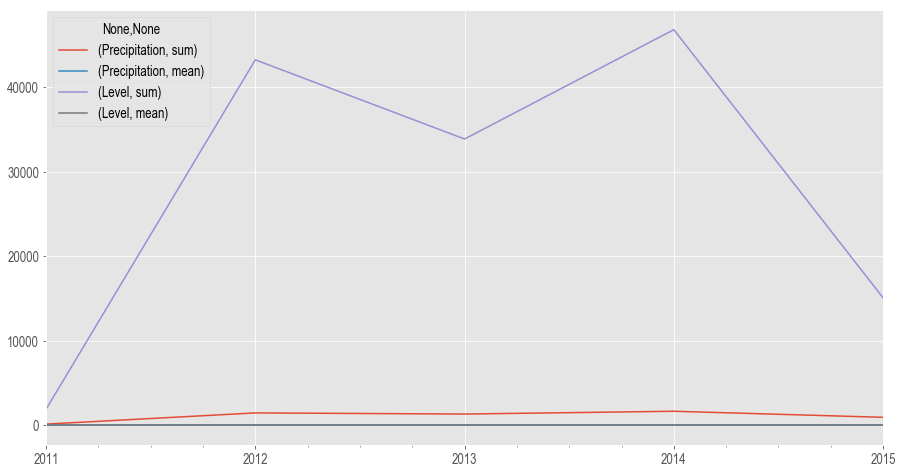

In [7]:
df[['Precipitation', 'Level']] \
    .resample('12M')\
    .apply(['sum', 'mean'])\
    .plot()

## Dados bacia RB10

In [8]:
# Loads data from CSV file to Pandas DataFrame object
df2 = pd.read_csv('RB10_dados_concatenados.csv')
df2.head()

Date      Time   Batt  SDI01  SDI07   Ana1
0  16/12/11  13:10:00  14.08   2.92   20.6  0.092
1  16/12/11  13:20:00  14.08   3.41   20.7  0.091
2  16/12/11  13:30:00  14.08   2.66   20.9  0.091
3  16/12/11  13:40:00  13.92   3.23   21.0  0.091
4  16/12/11  13:50:00  14.08   2.89   20.7  0.092

## Dados bacia RB11

In [9]:
# Loads data from CSV file to Pandas DataFrame object
df3 = pd.read_csv('RB11_dados_concatenados.csv')
df3.head()

Date      Time   Batt  SDI01  SDI07   Ana1
0  16/12/11  10:30:00  13.43   2.44   17.6  0.060
1  16/12/11  10:40:00  13.51   2.36   17.7  0.059
2  16/12/11  10:50:00  13.59   2.39   17.8  0.059
3  16/12/11  11:00:00  13.67   2.25   17.9  0.059
4  16/12/11  11:10:00  13.67   2.40   18.1  0.059